<a href="https://colab.research.google.com/github/HecVelaz/Codigos-de-Algoritmos--Ejemplos-variados/blob/main/TP8/HectoVelazquez_Tarea8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Hector Velazquez  
Tarea8

In [1]:
pip install networkx #instalacion para el uso de la biblioteca networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt #utilizado para graficos

In [6]:
class Grafo:
  def __init__(self):
    self.vertices= {}# diccionario que contiene vertices


  def add_arista(self , u , v , peso):#funcion para añadir aristas
    if u not in self.vertices:
      self.vertices[u] = [] # si u no esta en vertices se agrega lista vacia
    if v not in self.vertices:
      self.vertices[v] = []  #si v no esta en vertices se agrega lista vacia
    self.vertices[u].append((v,peso)) #se agrega la tulpa (v,peso) a la lista de vecinos u en dicc vertices
    self.vertices[v].append((u,peso)) #se agrega la tulpa (u,peso) a la lista de vecinos v en dicc vertices

  #algoritmo de prim
  def Prim(self,ini):#self: hace referencia a la instancia actual de la / ini : nodo actual
    visitados = set()#conjunto vacio para seguir nodos ya han sido visitados
    cola_prio = [(0,ini)]#tupla que tiene el peso inicial 0 y el nodo inicial, se usa para la arista de menor peso en cada iteracion
    costo_total = 0#registro del costo total del árbol de expansión mínimo.
    #mientra cola_prio NO este vacio
    while cola_prio:
          peso, nodo = cola_prio.pop(0)  # Utilizamos pop(0) para obtener el elemento de menor peso
          if nodo not in visitados:#verificacion de que un nodo no haya sido visitado previamente
            visitados.add(nodo) #se agrega el nodo actual al conjunto de visitados
            costo_total =costo_total + peso#actualizacion del costo total
            for vecino, peso_vecino in self.vertices[nodo]:#iteracion sobre los vecinos del nodo actual y sus pesos
              if vecino not in visitados:#si vecino no se visito
                cola_prio.append((peso_vecino, vecino)) ##se agrega el vecino a cola prio junto con el peso , se agrega una arista al conjunto
                cola_prio.sort()  # Ordenamos la cola de prioridad después de agregar un nuevo nodo
    return costo_total

#funcion para graficar el grafo
  def dibujar_grafo(self):
    G = nx.Graph()
    for nodo, vecinos in self.vertices.items():
      for vecino, peso in vecinos:
        G.add_edge(nodo, vecino, weight=peso)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, font_size=15, node_color='red', font_color='black')
    nx.draw_networkx_edge_labels(G, pos, font_color='blue', font_size=12)
    plt.title("Grafo")
    plt.show()



In [12]:
# Leer los nodos y las aristas del grafo
print("Entrada:")
nodos = input().split()
grafo = Grafo()
#entrada solo y único para 3 aristas
# Leer las aristas y sus pesos
for _ in range(3):  # Permitir exactamente tres conexiones
    u, v, peso = input().split()
    grafo.add_arista(u, v, int(peso))

# Calcular el costo total del MST utilizando el algoritmo de Prim
inicio = nodos[0]  # Utilizar el primer nodo como nodo inicial
costo_total_mst = grafo.Prim(inicio)

# Imprimir el costo total del MST
print("Salida:")
print(costo_total_mst)


Entrada:
a b c 
a b 5
b c 3
a c 1
Salida:
4


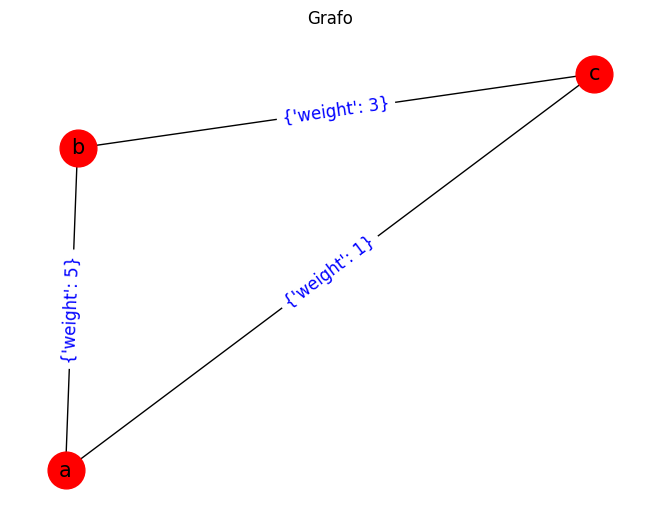

In [13]:
grafo.dibujar_grafo()
